In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi

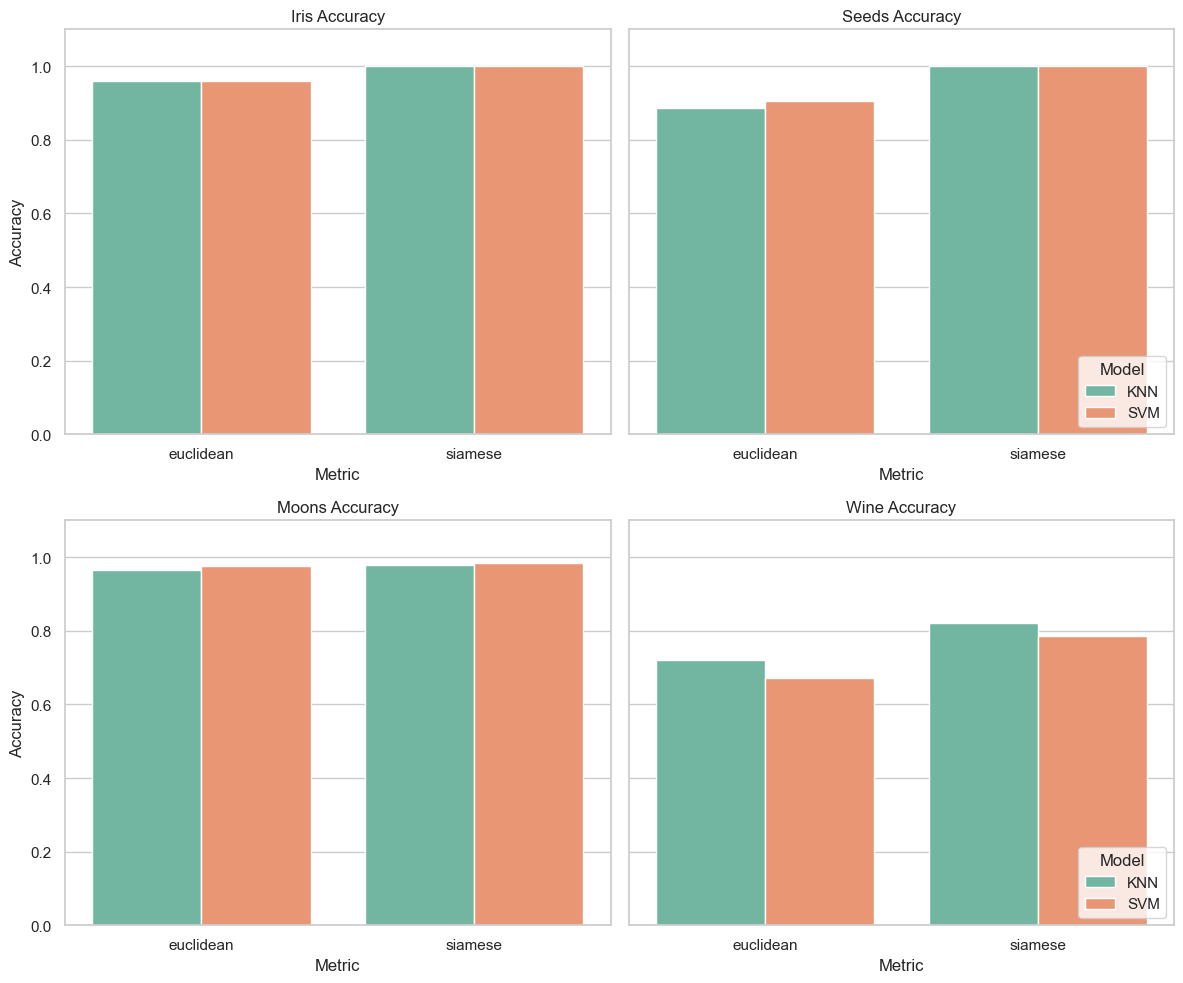

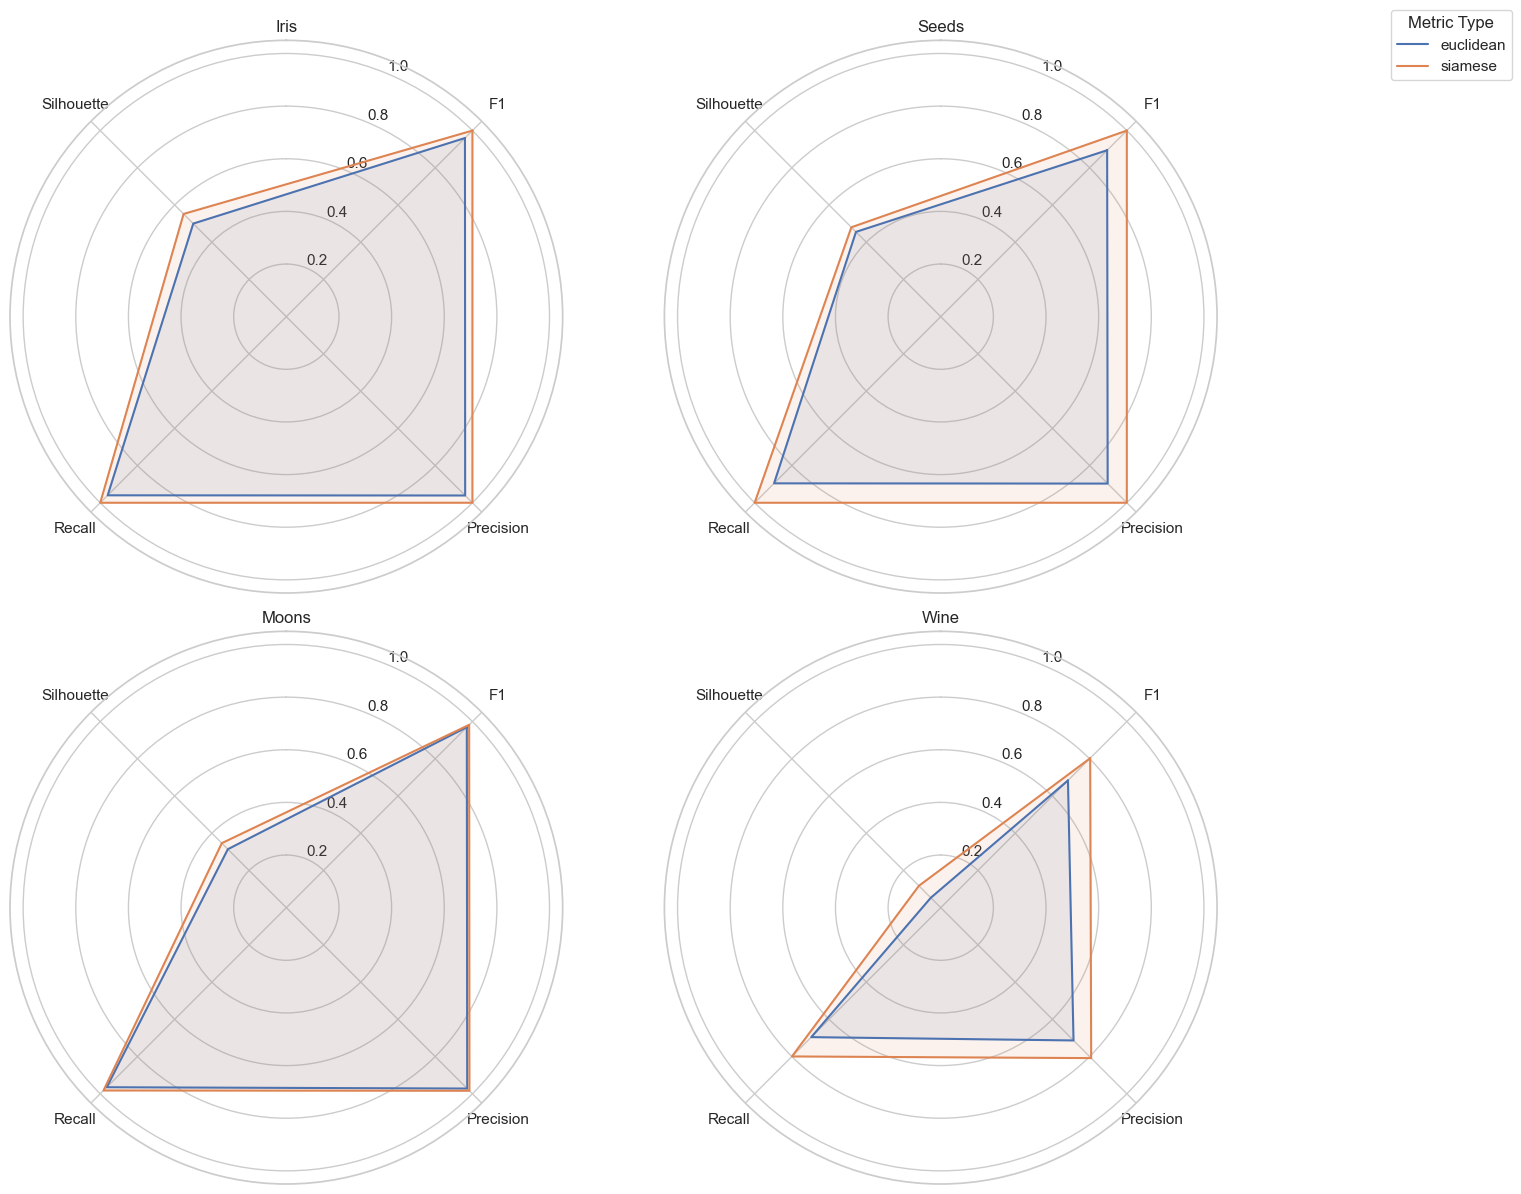

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Load CSV
df = pd.read_csv("results.csv")

sns.set(style="whitegrid")

datasets = df['dataset'].unique()
metrics = ['f1', 'precision', 'recall', 'silhouette']
metrics_labels = [m.capitalize() for m in metrics]

# --- 1. Combined Accuracy Bar Chart (2x2 grid) ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()

for ax, dataset in zip(axes, datasets):
    subset = df[df['dataset'] == dataset]
    sns.barplot(
        data=subset,
        x="metric", y="accuracy", hue="model",
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"{dataset.title()} Accuracy")
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Metric")
    ax.set_ylabel("Accuracy" if ax == axes[0] or ax == axes[2] else "")  # Y label only on left col
    if ax != axes[1] and ax != axes[3]:
        ax.legend_.remove()
    else:
        ax.legend(title="Model", loc="lower right")

# Hide any unused axes (if datasets < 4)
for i in range(len(datasets), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig("combined_accuracy_bar_2x2.png")
plt.show()

# --- Updated Radar Chart Function: Averages across models ---
def plot_radar_subplot(ax, df, dataset):
    N = len(metrics)
    angles = [pi / 4 + (n / float(N) * 2 * pi) for n in range(N)]
    angles += angles[:1]  # Close loop

    # For each metric type (euclidean, siamese...), average across models for this dataset
    for metric_type in df['metric'].unique():
        subset = df[(df['dataset'] == dataset) & (df['metric'] == metric_type)]
        if subset.empty:
            continue
        avg_vals = subset[metrics].mean().tolist()
        avg_vals += avg_vals[:1]
        ax.plot(angles, avg_vals, label=metric_type)
        ax.fill(angles, avg_vals, alpha=0.1)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], metrics_labels)
    ax.set_ylim(0, 1.05)
    ax.set_title(dataset.title())

# --- Create 2x2 grid of radar charts for each dataset ---
fig_radar, axes_radar = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(14, 12))
axes_radar = axes_radar.flatten()

for ax, dataset in zip(axes_radar, datasets):
    plot_radar_subplot(ax, df, dataset)

# Hide any unused subplots
for i in range(len(datasets), len(axes_radar)):
    axes_radar[i].axis('off')

# Unique metric types
handles, labels = axes_radar[0].get_legend_handles_labels()
fig_radar.legend(handles, labels, loc='upper left', title="Metric Type")
plt.tight_layout()
plt.savefig("average_radar_2x2.png", bbox_inches="tight")
plt.show()
